In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


phase = cv.imread(r"D:\Pranav\Machine-Learning\gui\saved_images\1_phase.jpg")
topo = cv.imread("C:/Users/Pranav/Downloads/1_topo.jpg")
amp = cv.imread("C:/Users/Pranav/Downloads/1_amplitude.jpg")



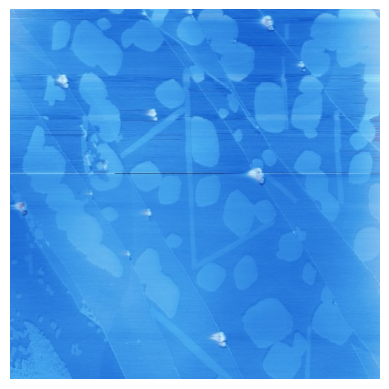

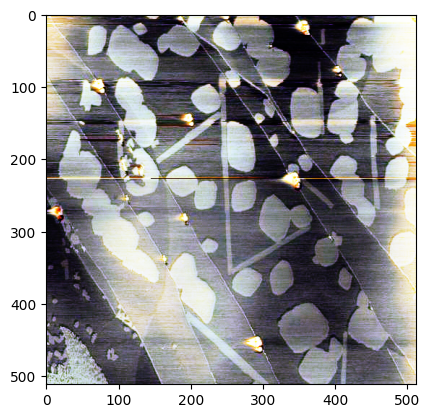

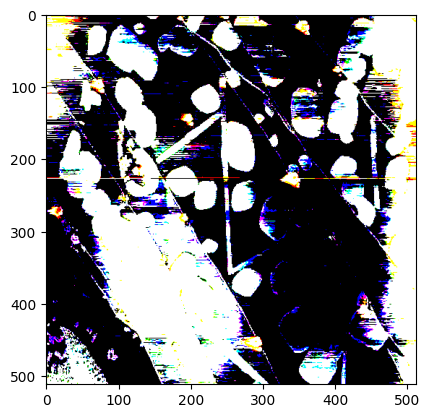

In [34]:

# Function to denoise images by averaging
phase_fp = phase.astype(np.float32) / 255.0
topo_fp = topo.astype(np.float32) / 255.0
amp_fp = amp.astype(np.float32) / 255.0

images = [phase_fp, topo_fp]
average = np.mean(images, axis=0)
average = (average * 255).astype(np.uint8)
plt.imshow(average)
plt.axis('off')  # Turn off axis labels
plt.show()
b, g, r = cv.split(average)

# Apply histogram equalization to each color channel
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Merge the equalized color channels
equalized_image = cv.merge((b_eq, g_eq, r_eq))

plt.imshow(equalized_image)

denoised_image = cv.fastNlMeansDenoisingColored(equalized_image, None, 5,5,3,10)
_, thresholded = cv.threshold(equalized_image, 150, 255, cv.THRESH_BINARY)

plt.show()
plt.imshow(thresholded)

